In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Load data

In [28]:
train_set = pd.read_csv('../data/train.csv')
test_set = pd.read_csv('../data/test.csv')

In [29]:
cat_cols = ['EJ']
id_cols = ['Id']
target_col = ['Class']
features = [col for col in train_set.columns if col not in cat_cols + id_cols + target_col]

In [30]:
len(features)

55

In [5]:
train_set.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,22.5984,175.638726,152.707705,823.928241,257.432377,47.223358,0.563481,23.387600,4.851915,0.023482,1.050225,0.069225,13.784111,1.302012,36.205956,69.08340,295.570575,0.23868,0.284232,89.245560,84.31664,29.657104,5.310690,1.74307,23.187704,7.294176,1.987283,1433.166750,0.949104,B,30.879420,78.526968,3.828384,13.394640,10.265073,9028.291921,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,19.4205,155.868030,14.754720,51.216883,257.432377,30.284345,0.484710,50.628208,6.085041,0.031442,1.113875,1.117800,28.310953,1.357182,37.476568,70.79836,178.553100,0.23868,0.363489,110.581815,75.74548,37.532000,0.005518,1.74307,17.222328,4.926396,0.858603,1111.287150,0.003042,A,109.125159,95.415086,52.260480,17.175984,0.296850,6785.003474,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,26.4825,128.988531,219.320160,482.141594,257.432377,32.563713,0.495852,85.955376,5.376488,0.036218,1.050225,0.700350,39.364743,1.009611,21.459644,70.81970,321.426625,0.23868,0.210441,120.056438,65.46984,28.053464,1.289739,1.74307,36.861352,7.813674,8.146651,1494.076488,0.377208,B,109.125159,78.526968,5.390628,224.207424,8.745201,8338.906181,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,23.6577,237.282264,11.050410,661.518640,257.432377,15.201914,0.717882,88.159360,2.347652,0.029054,1.400300,0.636075,41.116960,0.722727,21.530392,47.27586,196.607985,0.23868,0.292431,139.824570,71.57120,24.354856,2.655345,1.74307,52.003884,7.386060,3.813326,15691.552180,0.614484,B,31.674357,78.526968,31.323372,59.301984,7.884336,10965.766040,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,24.0108,324.546318,149.717165,6074.859475,257.432377,82.213495,0.536467,72.644264,30.537722,0.025472,1.050225,0.693150,31.724726,0.827550,34.415360,74.06532,200.178160,0.23868,0.207708,97.920120,52.83888,26.019912,1.144902,1.74307,9.064856,7.350720,3.490846,1403.656300,0.164268,B,109.125159,91.994825,51.141336,29.102640,4.274640,16198.049590,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [6]:
na_mean = train_set.isna().mean(axis=0)
na_mean[na_mean > 0]

BQ    0.097245
CB    0.003241
CC    0.004862
DU    0.001621
EL    0.097245
FC    0.001621
FL    0.001621
FS    0.003241
GL    0.001621
dtype: float64

<Axes: >

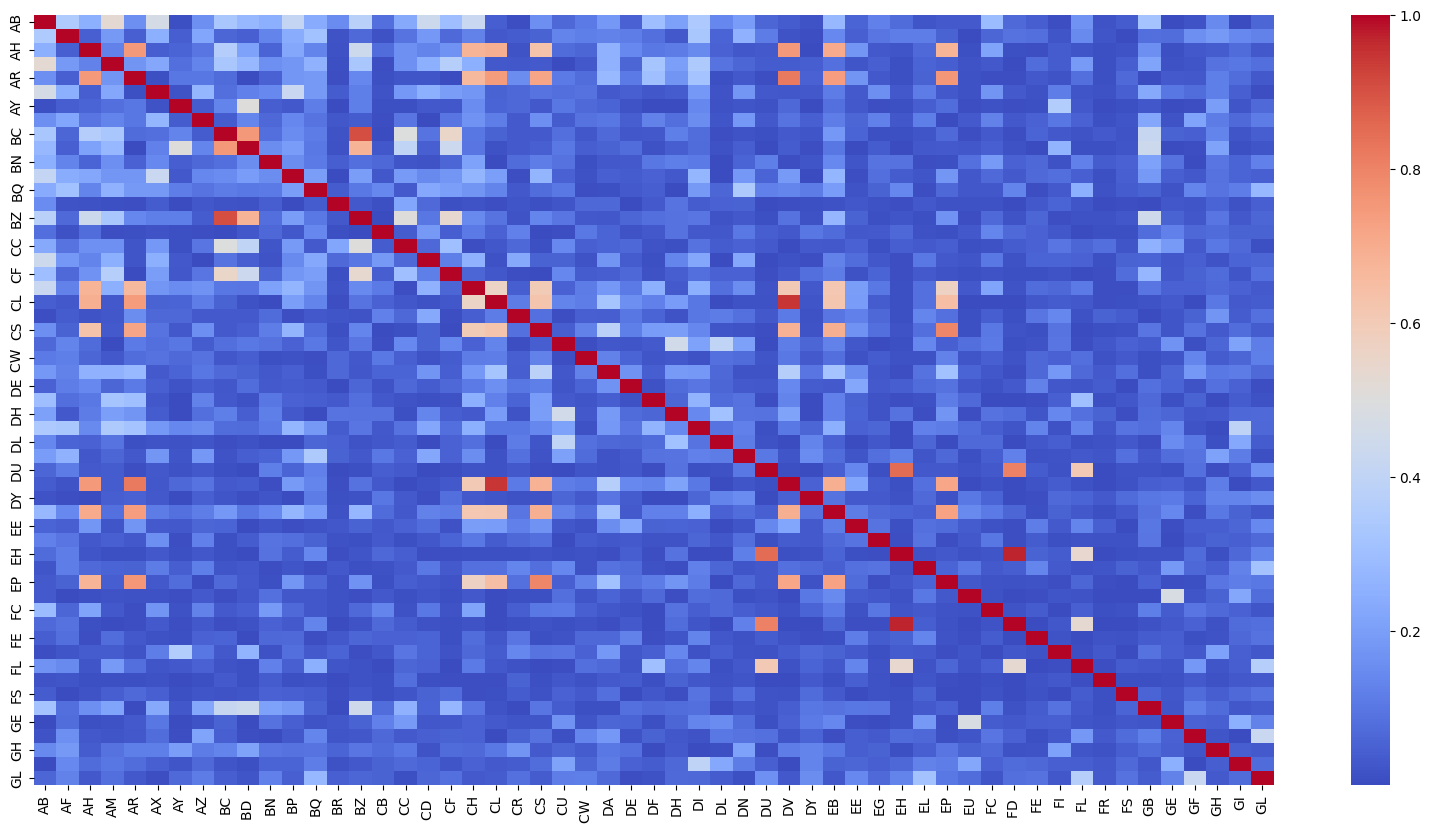

In [7]:
plt.figure(figsize=(20, 10))
corr_abs = train_set[features].corr().abs()
sns.heatmap(corr_abs, cmap='coolwarm',)

<Axes: >

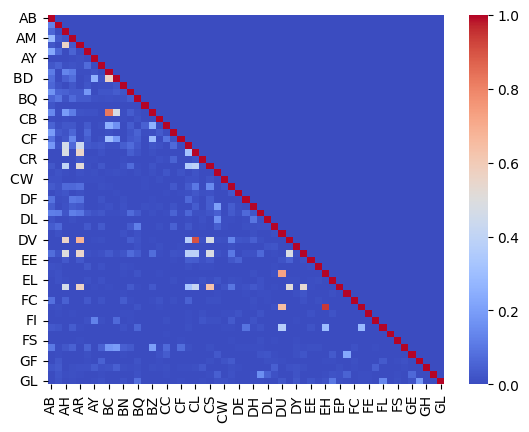

In [8]:
corr_abs = np.tril(corr_abs) * corr_abs
sns.heatmap(corr_abs, cmap='coolwarm',)


In [9]:
corr_abs_melt = corr_abs.reset_index().melt(id_vars='index')
corr_abs_melt = corr_abs_melt.query("value < 1 and value >= 0.6 and value != 0")
corr_abs_melt

,index,variable,value
253,DV,AR,0.677348
454,BZ,BC,0.824429
1133,DV,CL,0.900585
1250,EP,CS,0.630687
1798,EH,DU,0.724127
1803,FD,DU,0.649618
2133,FD,EH,0.943137


In [10]:
features = np.setdiff1d(features, corr_abs_melt['index'].unique())

<Axes: >

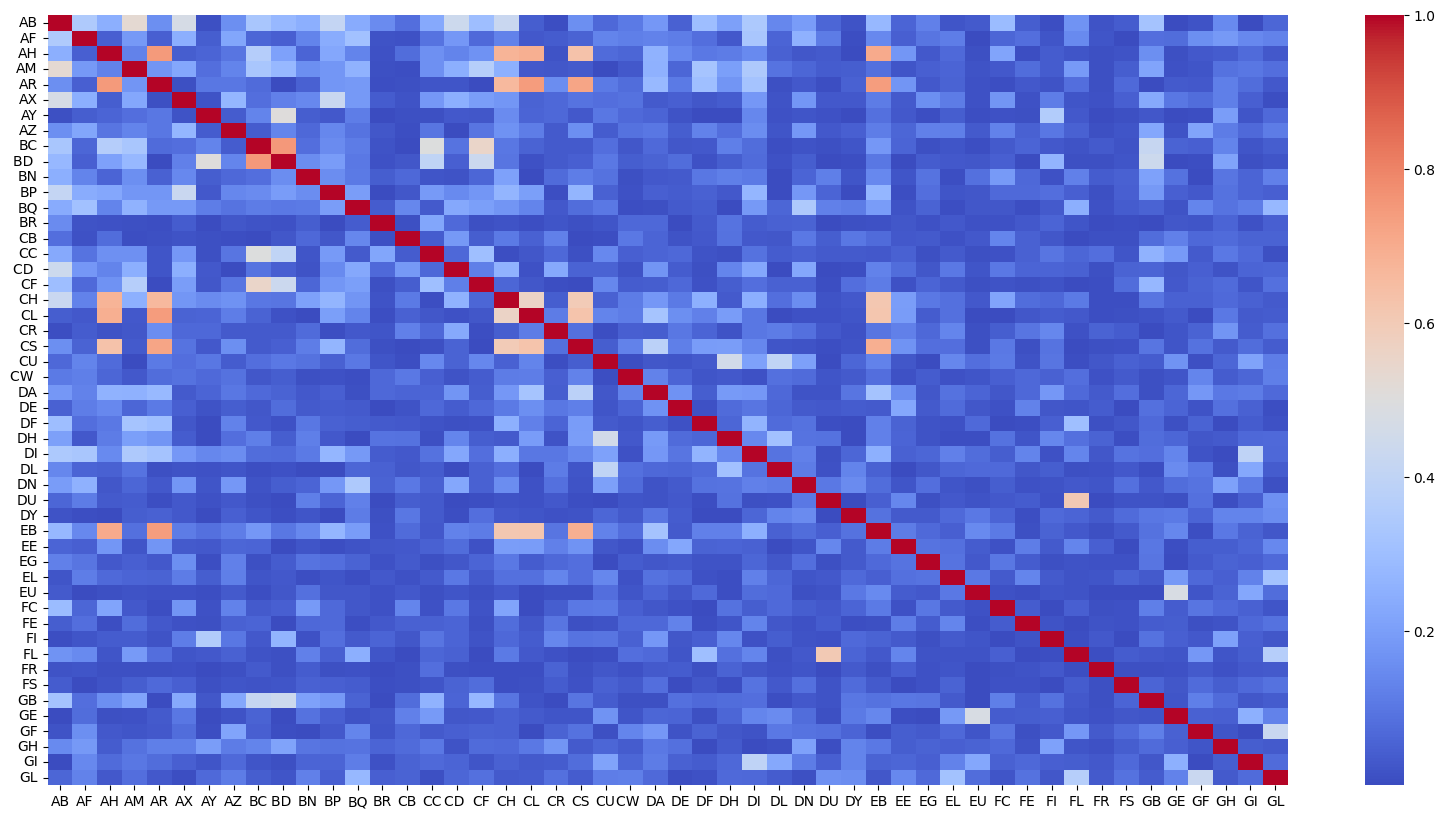

In [11]:
plt.figure(figsize=(20, 10))
corr_abs = train_set[features].corr().abs()
sns.heatmap(corr_abs, cmap='coolwarm',)

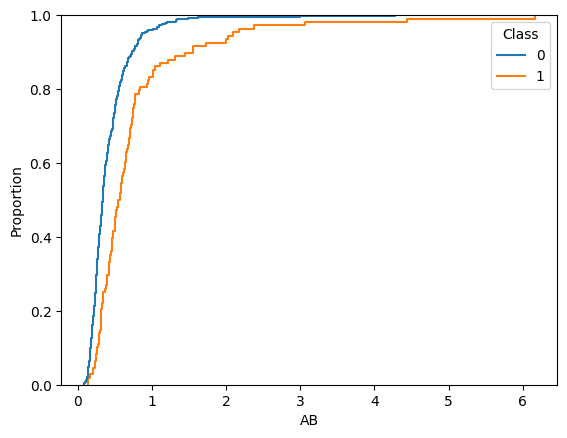

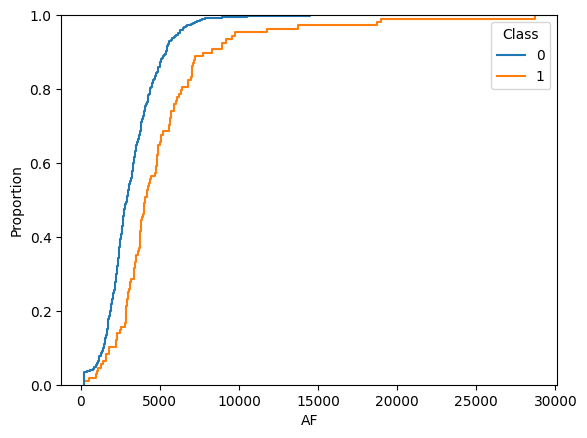

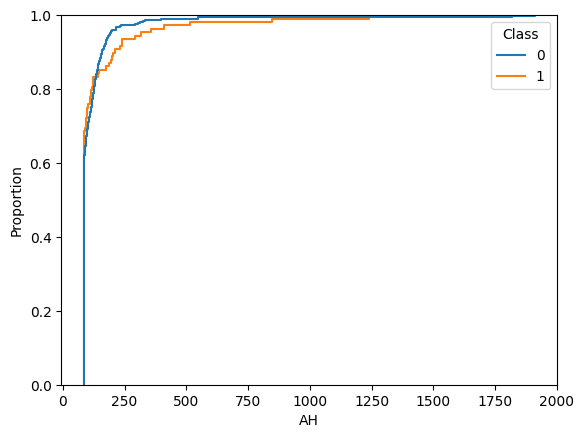

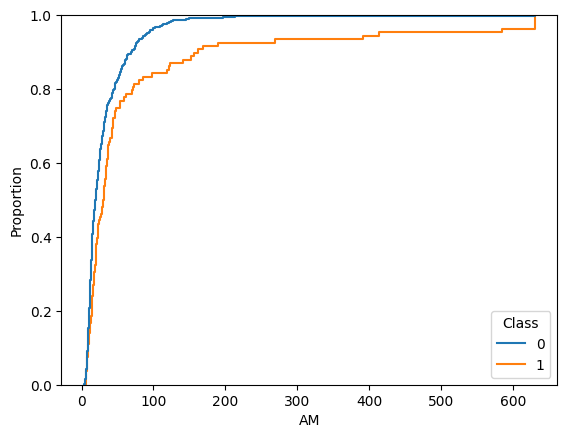

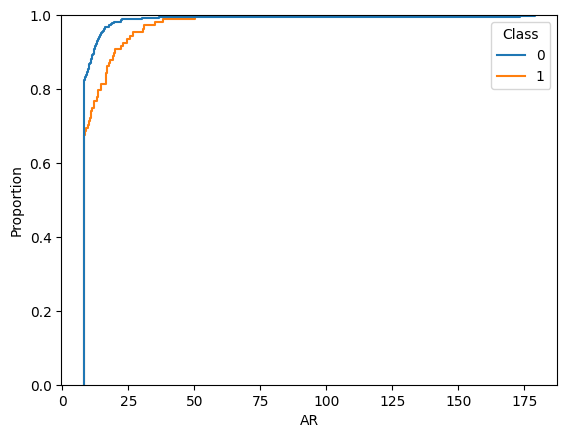

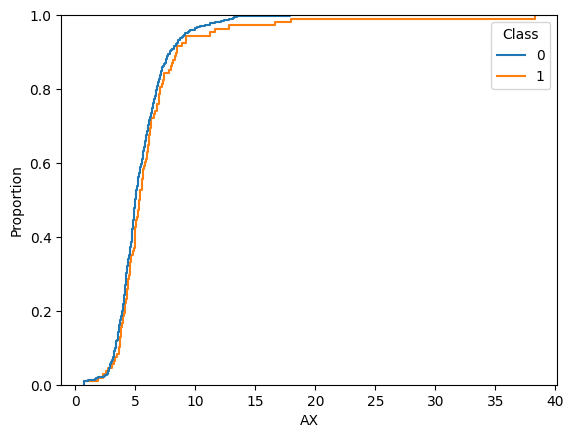

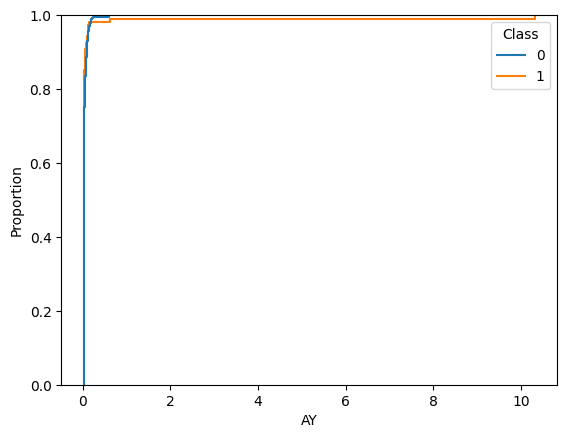

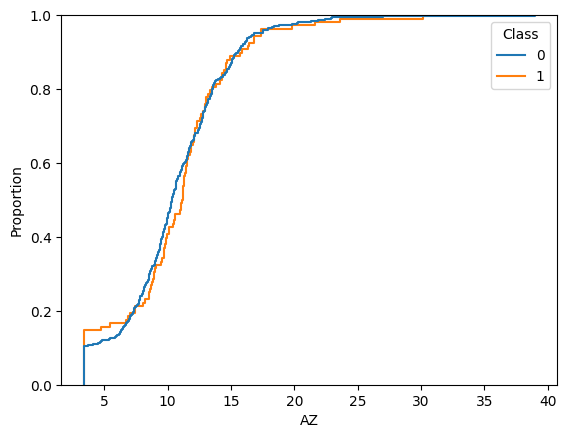

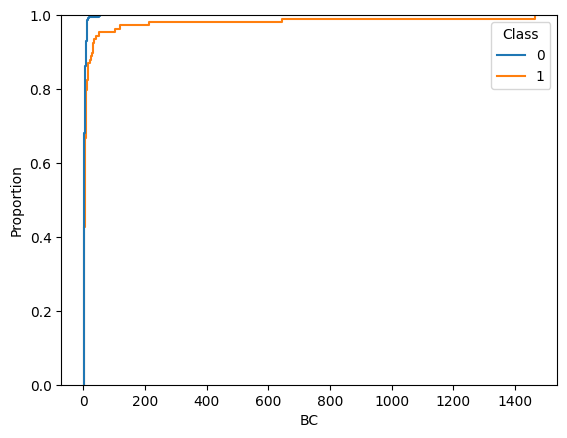

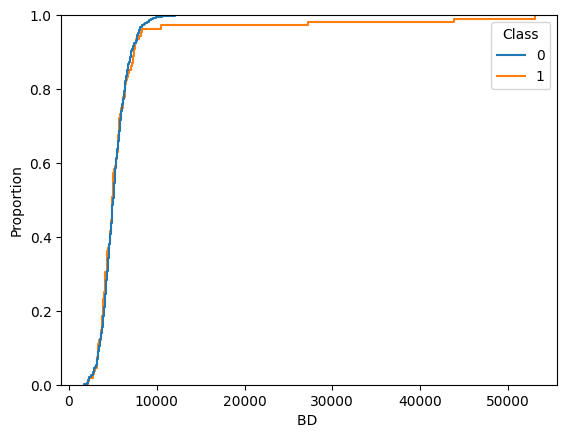

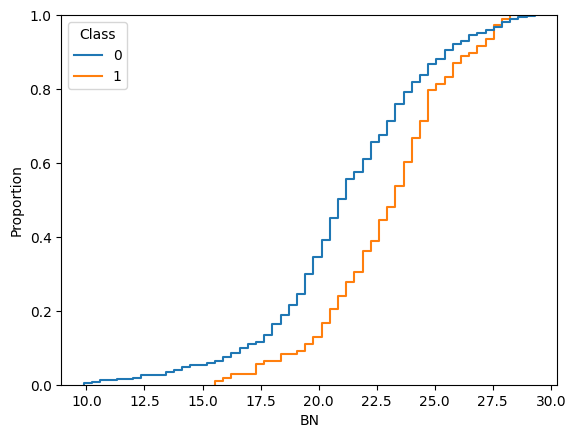

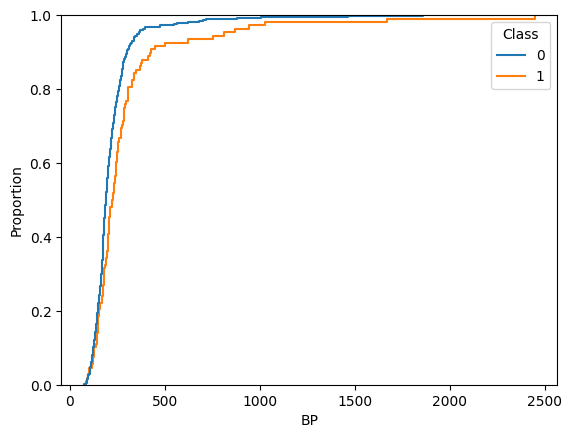

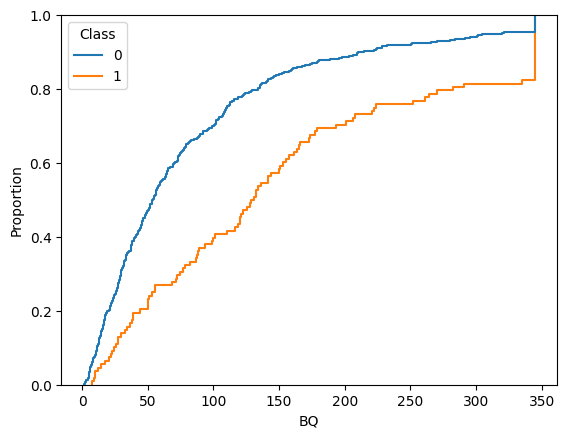

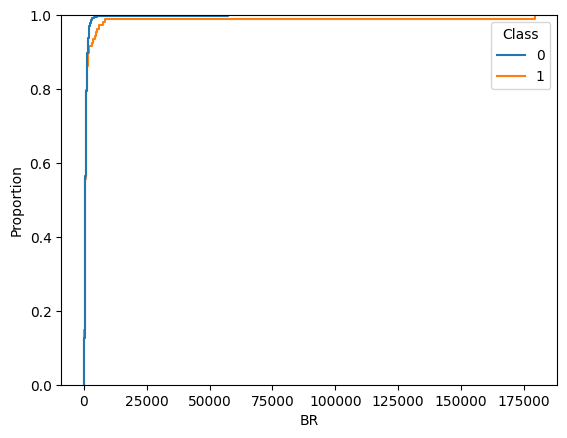

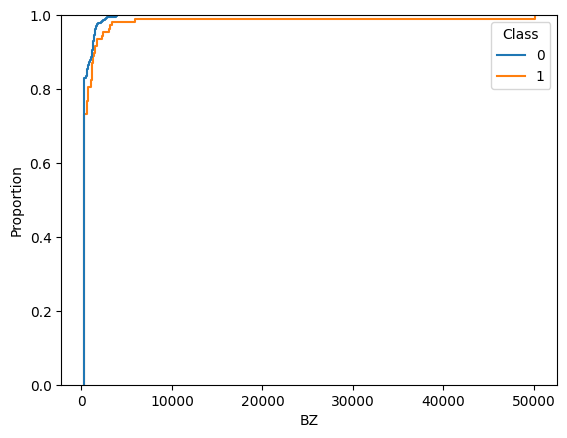

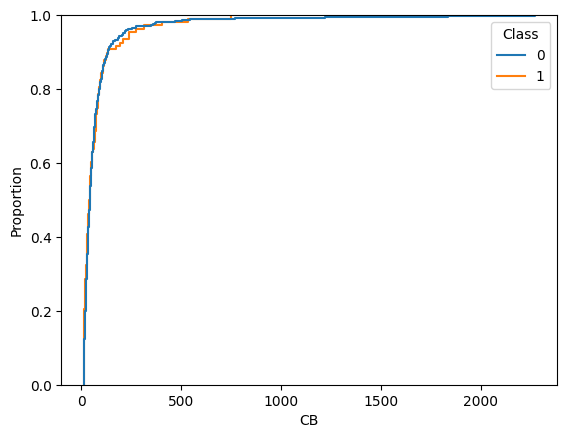

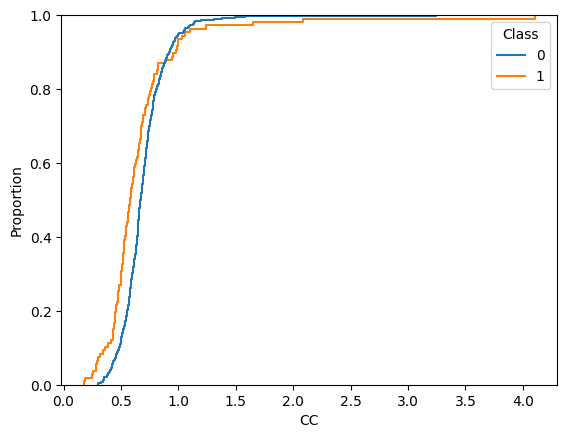

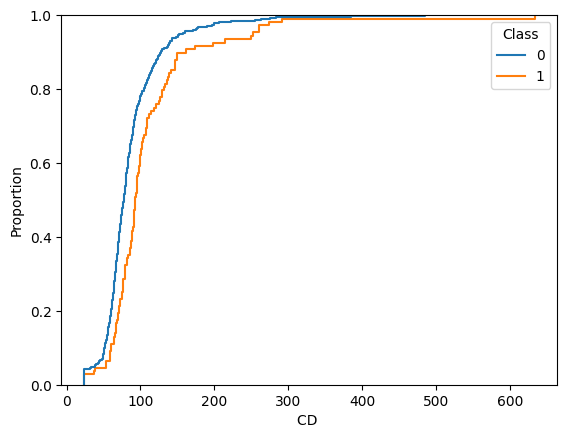

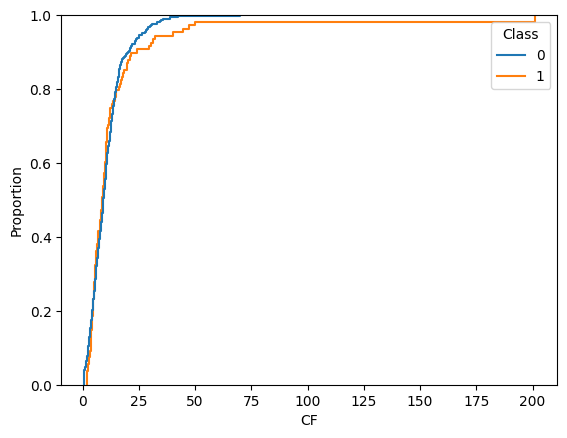

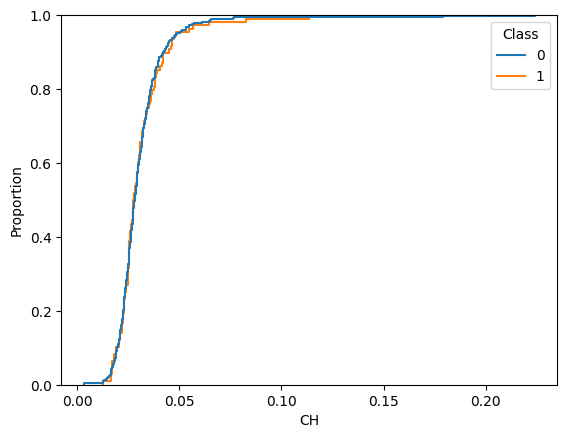

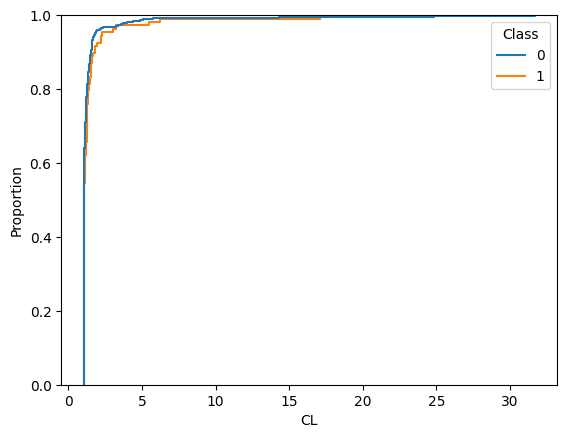

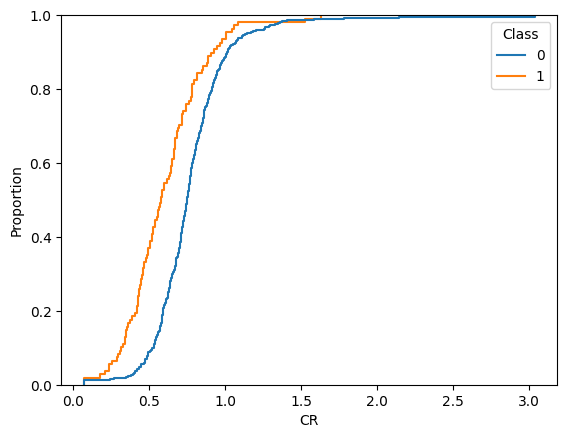

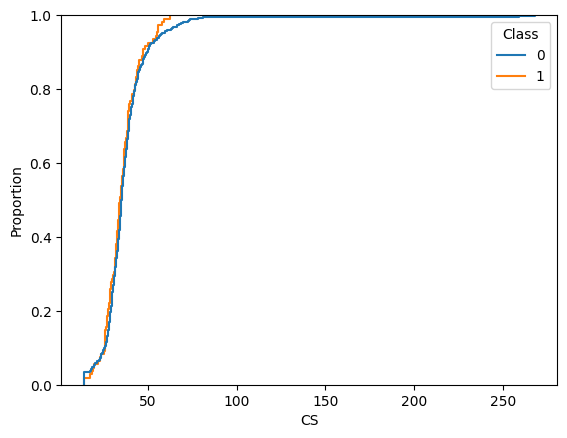

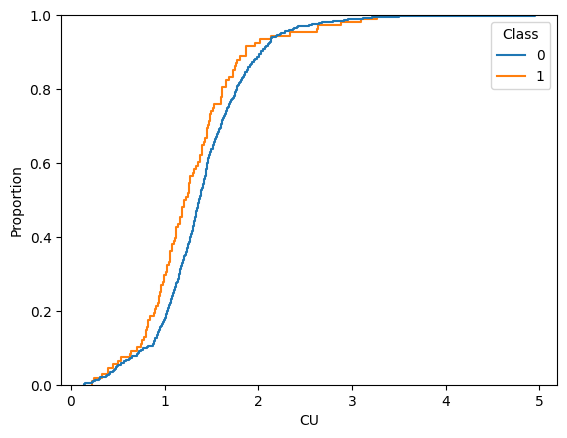

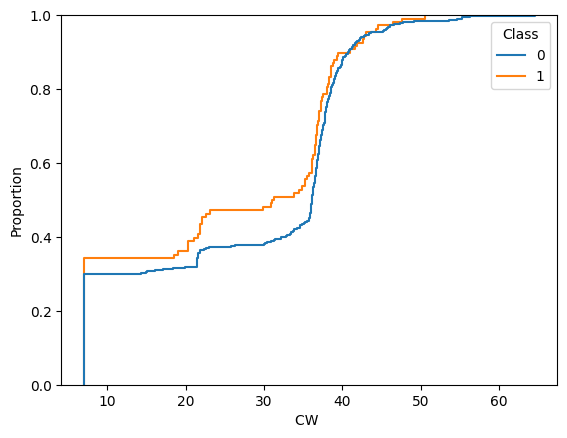

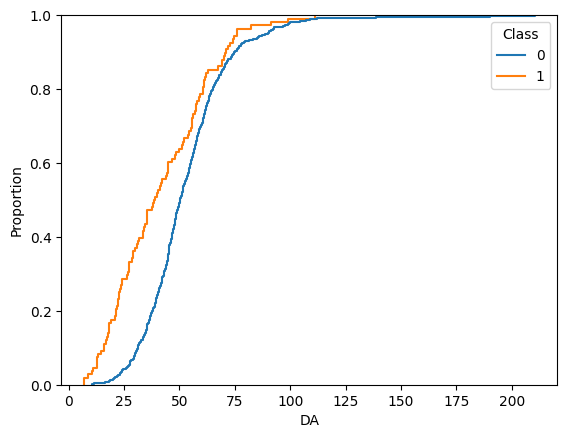

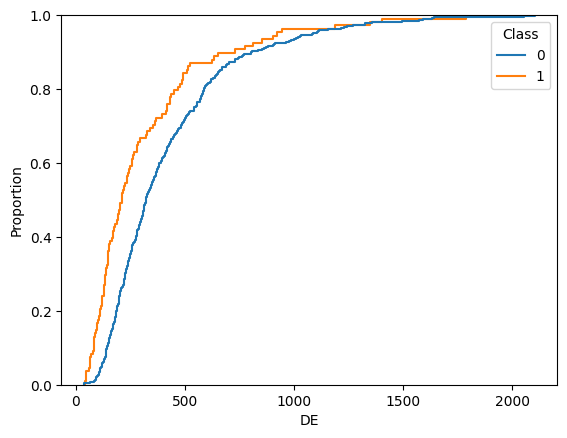

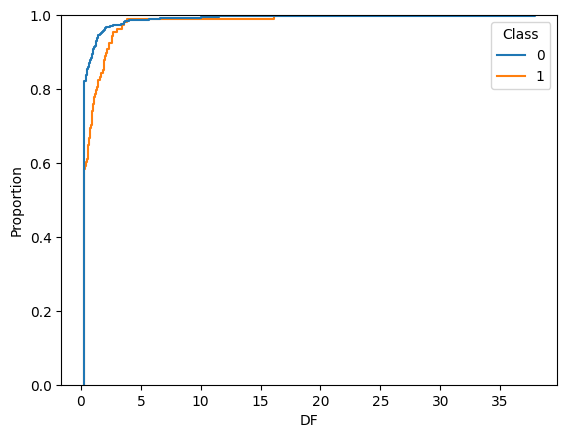

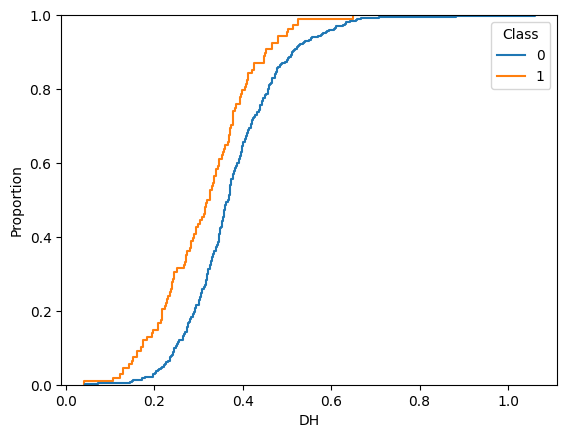

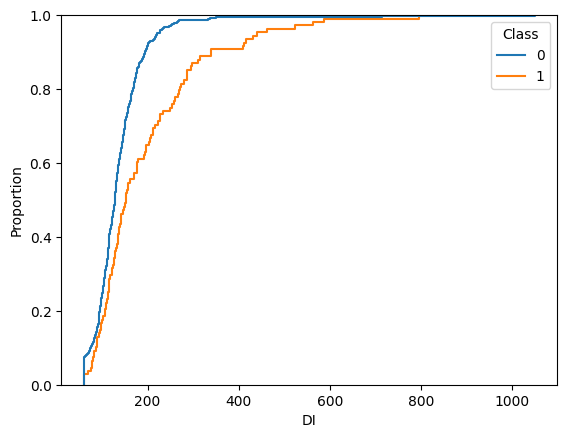

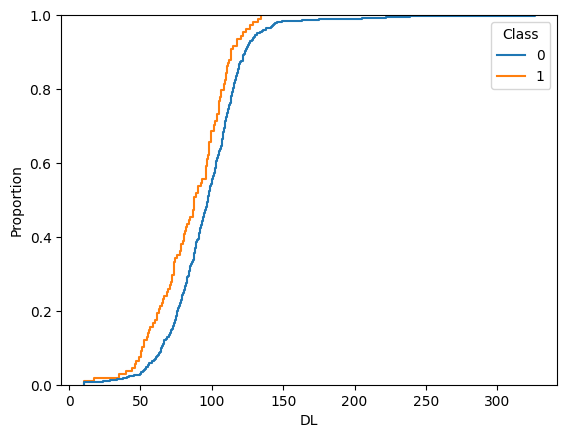

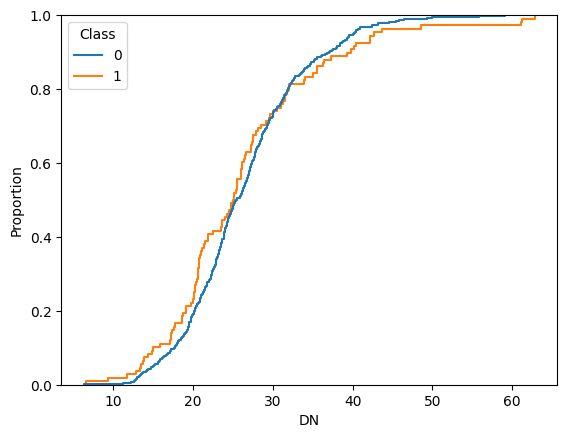

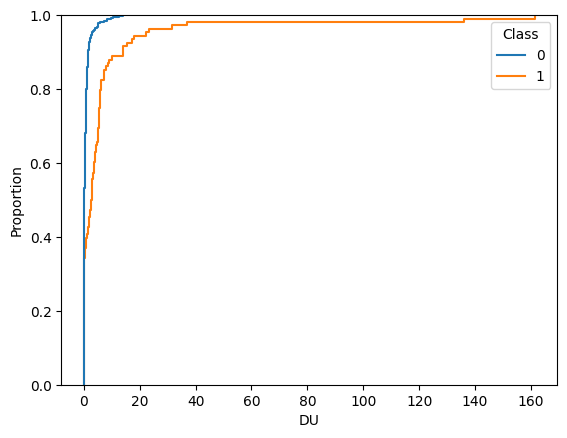

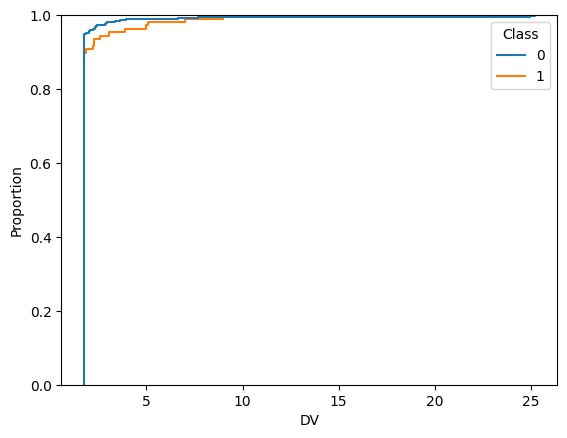

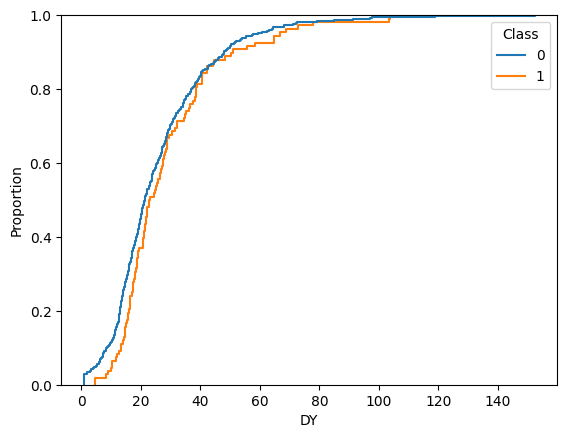

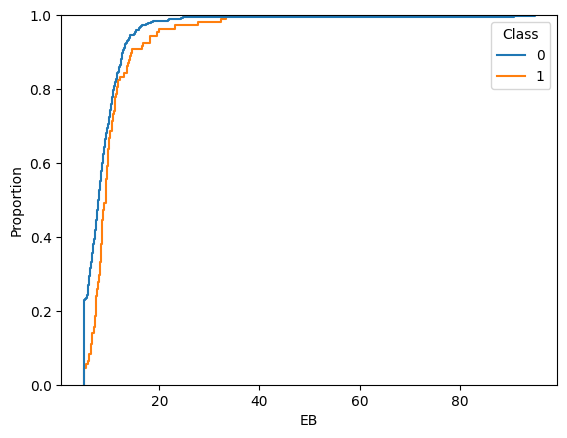

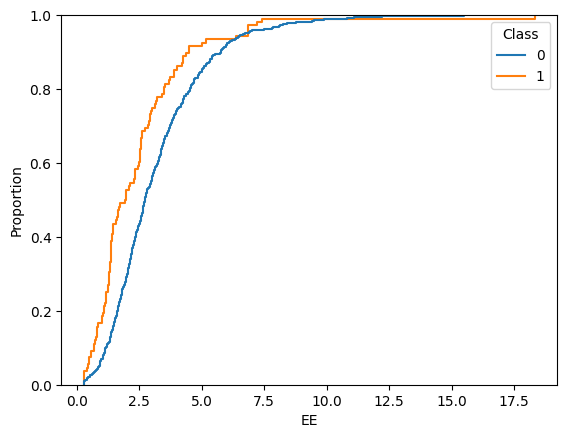

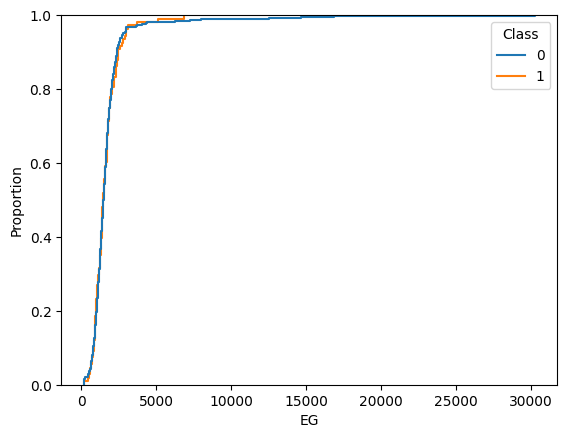

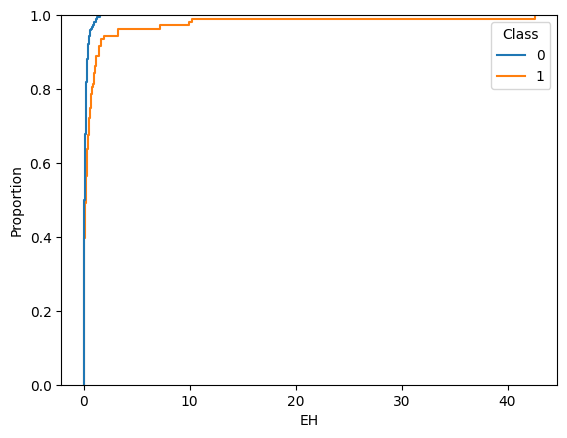

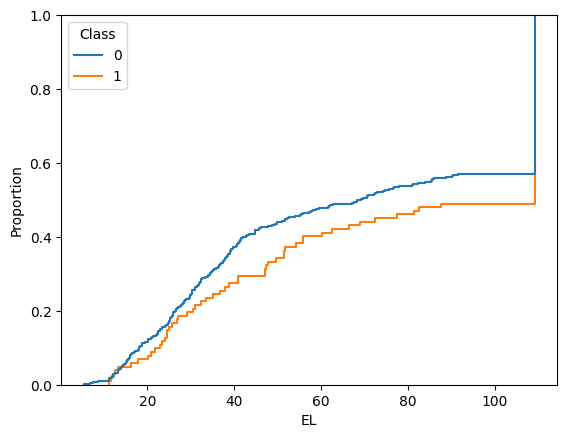

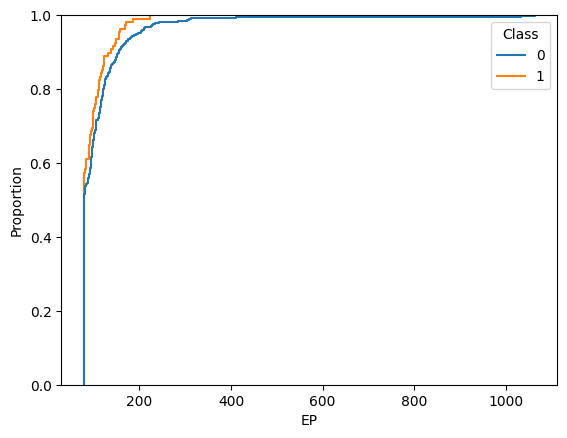

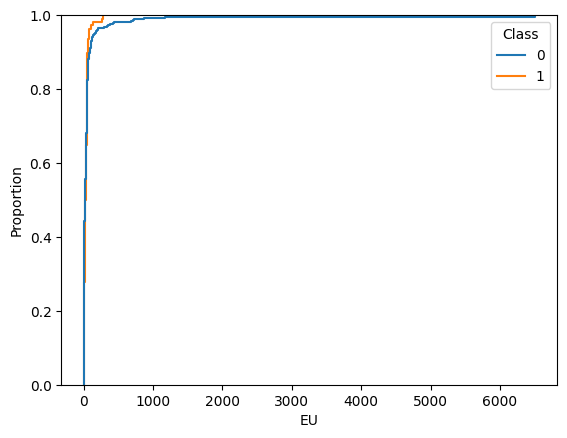

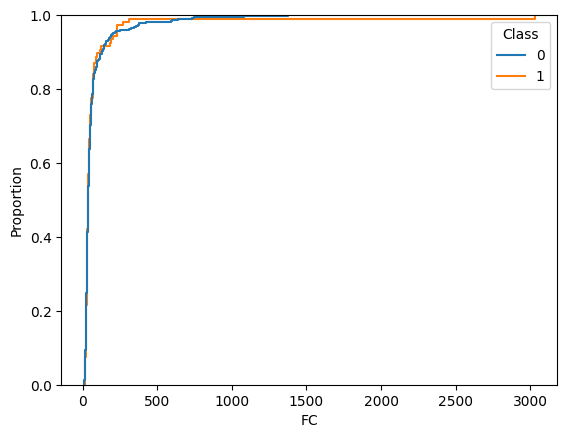

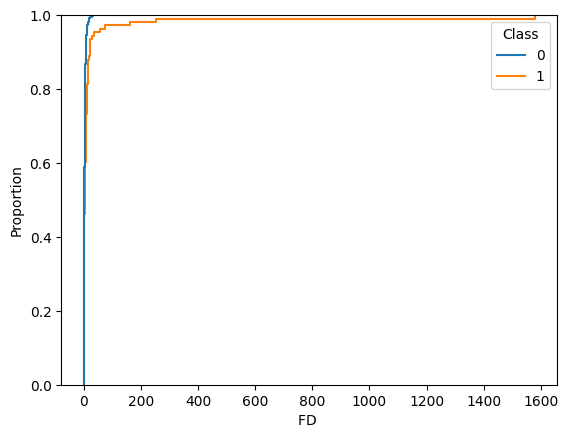

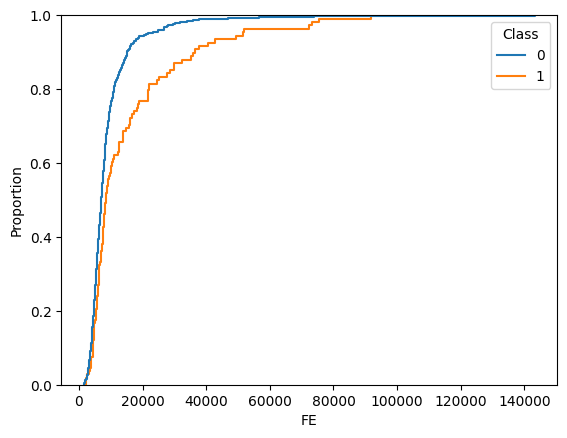

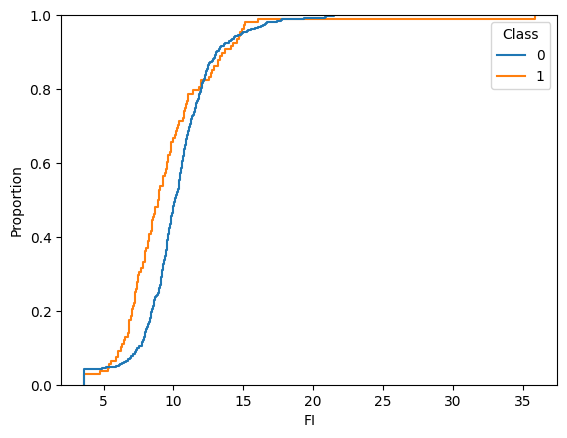

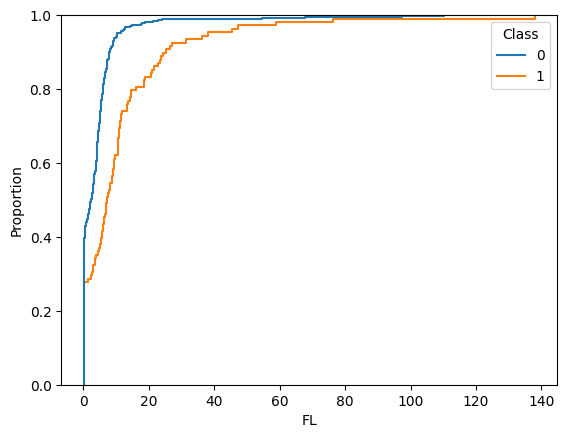

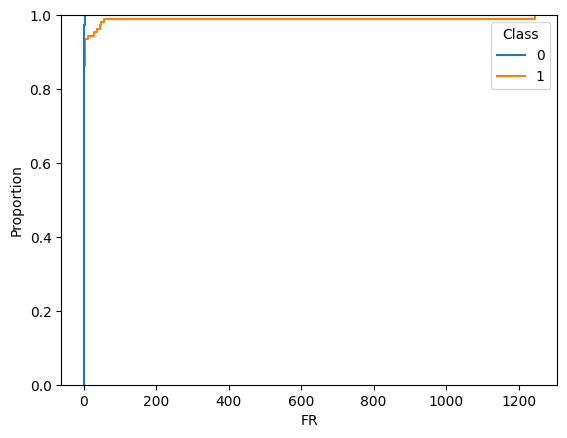

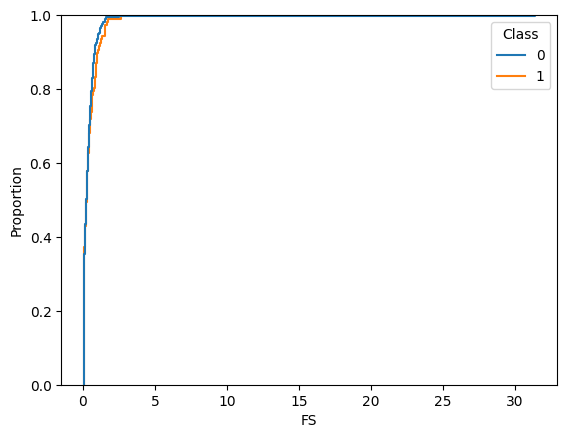

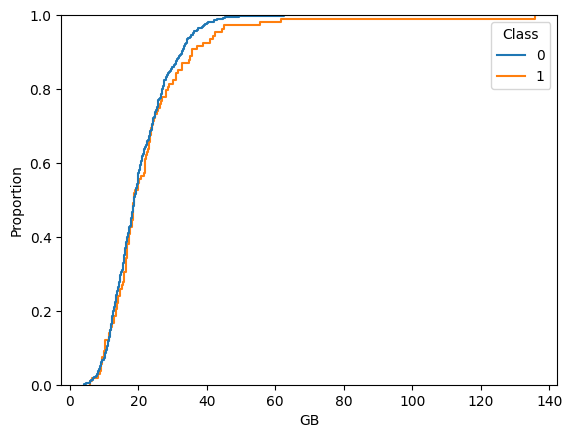

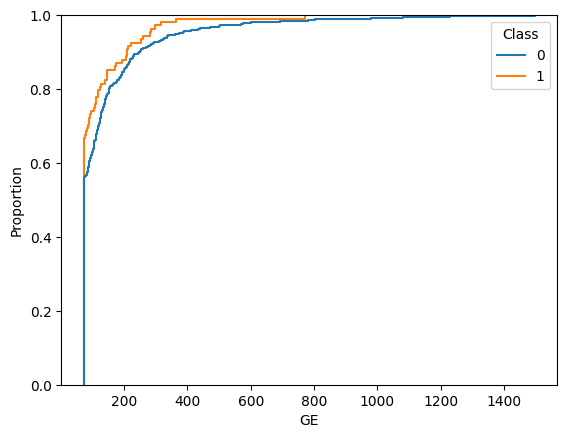

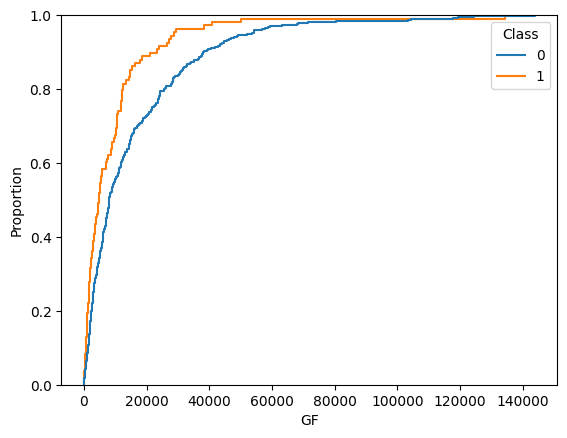

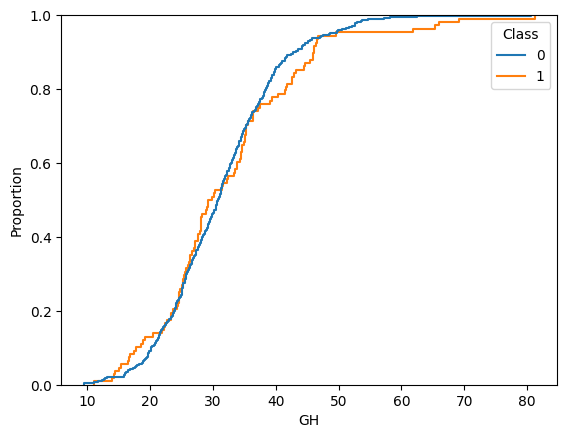

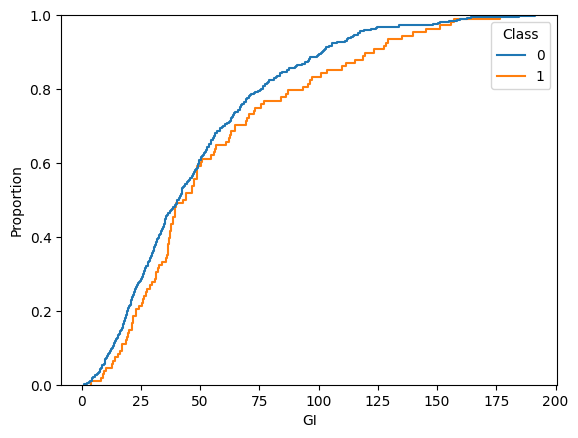

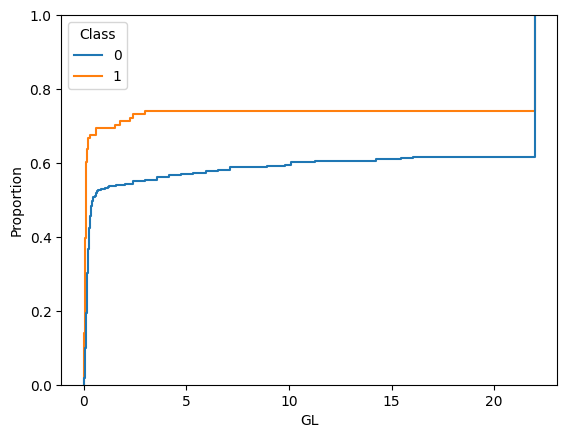

In [39]:
for f in features:
    sns.ecdfplot(data=train_set, x=f, hue='Class', )#kde=True, bins=100)
    plt.show()


In [13]:
def balanced_log_loss(y_true, y_pred):
    # y_true: correct labels 0, 1
    # y_pred: predicted probabilities of class=1
    # calculate the number of observations for each class
    N_0 = np.sum(1 - y_true)
    N_1 = np.sum(y_true)
    # calculate the weights for each class to balance classes
    w_0 = 1 / N_0
    w_1 = 1 / N_1
    # calculate the predicted probabilities for each class
    p_1 = np.clip(y_pred, 1e-15, 1 - 1e-15)
    p_0 = 1 - p_1
    # calculate the summed log loss for each class
    log_loss_0 = -np.sum((1 - y_true) * np.log(p_0))
    log_loss_1 = -np.sum(y_true * np.log(p_1))
    # calculate the weighted summed logarithmic loss
    # (factgor of 2 included to give same result as LL with balanced input)
    balanced_log_loss = 2*(w_0 * log_loss_0 + w_1 * log_loss_1) / (w_0 + w_1)
    # return the average log loss
    return balanced_log_loss/(N_0+N_1)

from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer


In [15]:
features_with_cat = list(features) + cat_cols
cat_col_idx = [len(features_with_cat) - 1]
cross_val_score(CatBoostClassifier(verbose=0, cat_features=cat_col_idx, iterations=3000, max_depth=12), 
                train_set[features_with_cat], train_set['Class'], 
                scoring=make_scorer(balanced_log_loss), 
                cv=StratifiedKFold(n_splits=5, shuffle=True, 
                                   random_state=42))

array([5.23832576, 4.68124644, 5.99503119, 4.67093029, 3.08199147])

In [72]:
np.array([3.76476486, 2.78539663, 3.06829407, 3.91754957, 1.49305264]).mean()

3.005811554

In [77]:
np.array([3.76476486, 2.48888102, 3.78970216, 4.30109434, 2.15054717]).mean()

3.2989979099999998

In [40]:
from sklearn.linear_model import LogisticRegression
cross_val_score(LogisticRegression(max_iter=1000), train_set[['DN']], train_set['Class'], 
                scoring=make_scorer(balanced_log_loss),
                cv=StratifiedKFold(n_splits=5, shuffle=True,
                                      random_state=42)) 


array([10.08129738, 10.08129738, 10.14543739,  9.78016512,  9.78016512])

In [60]:
train_set['y_hat']=  ((train_set['CR'] <= .6)).astype(int)

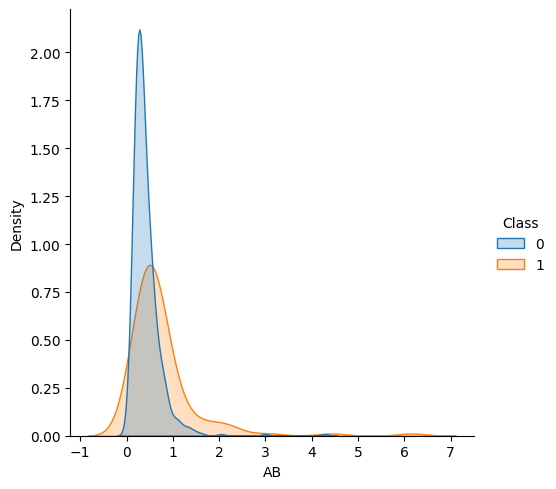

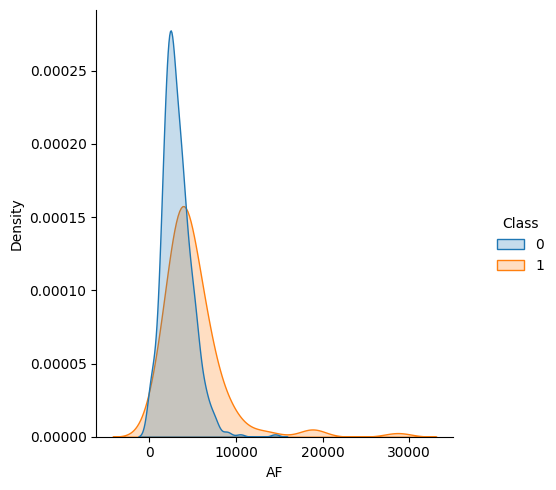

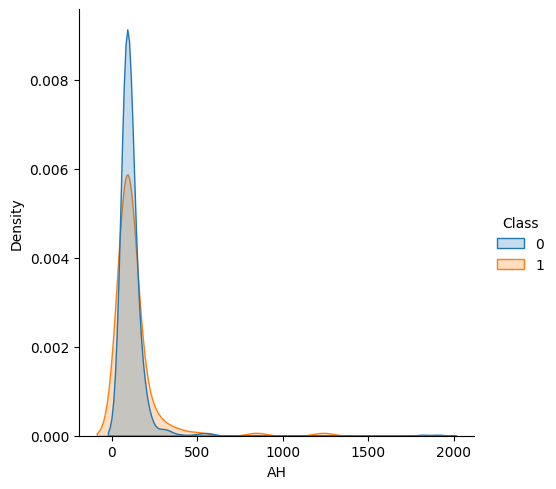

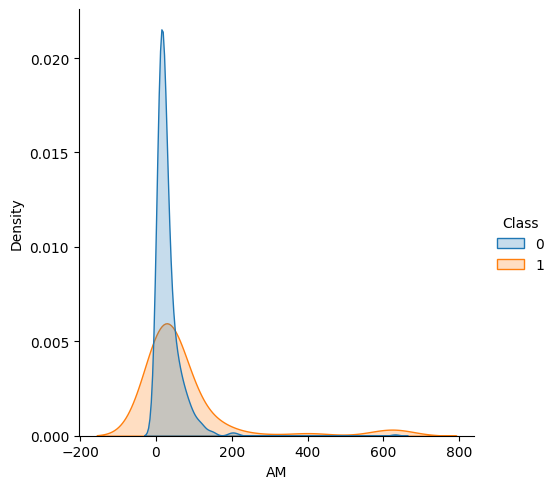

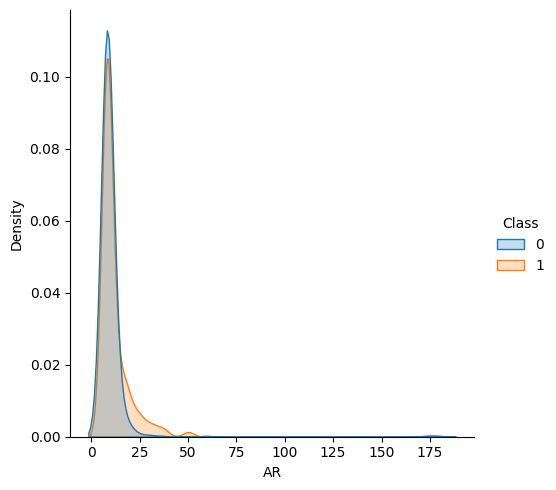

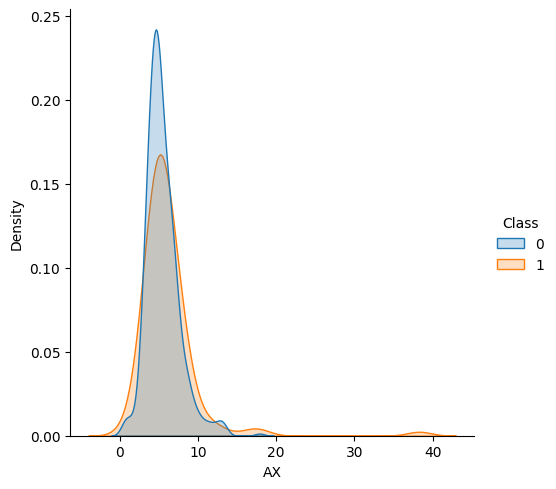

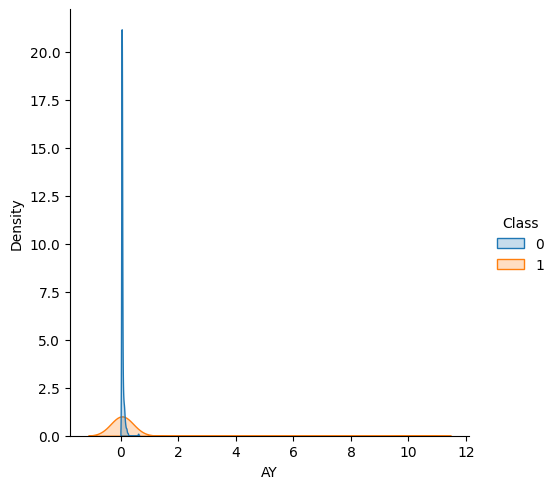

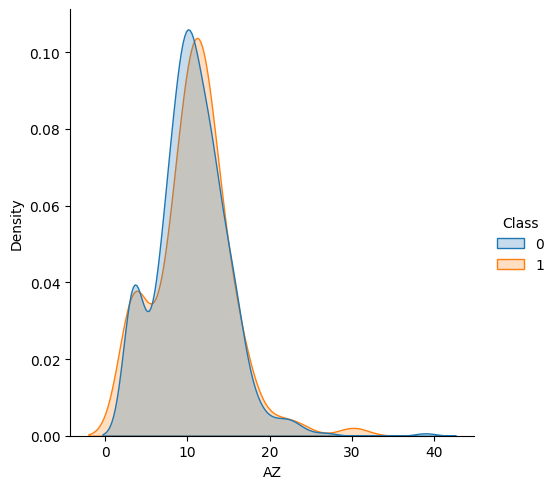

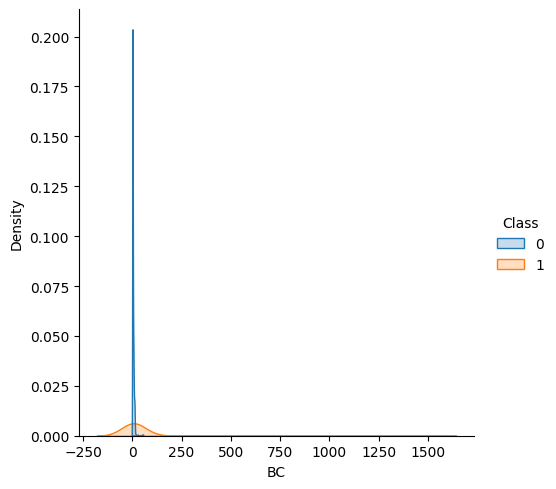

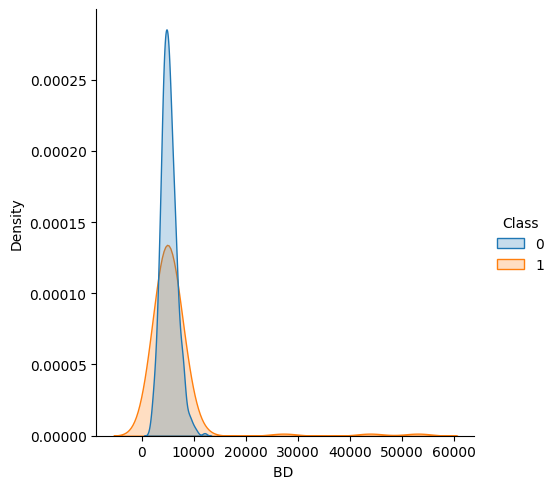

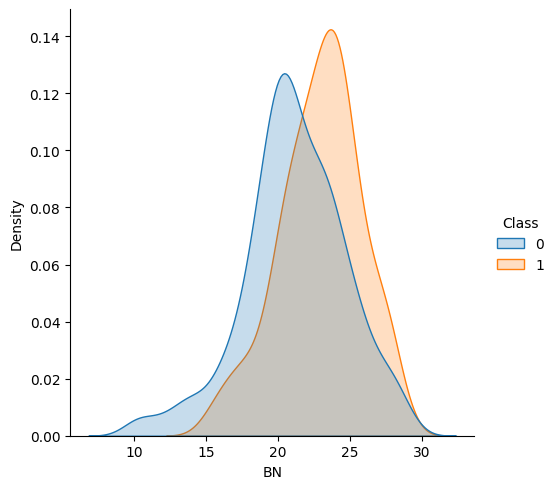

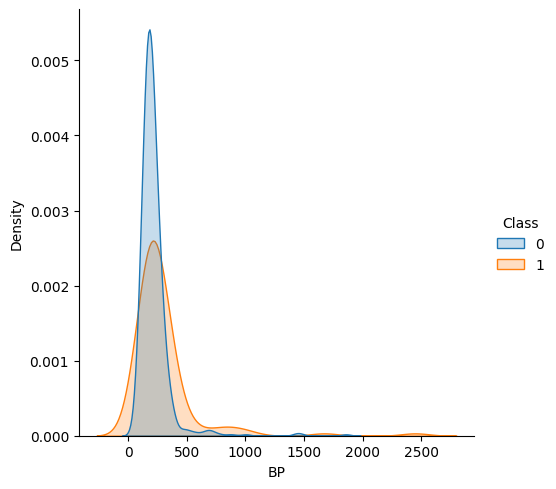

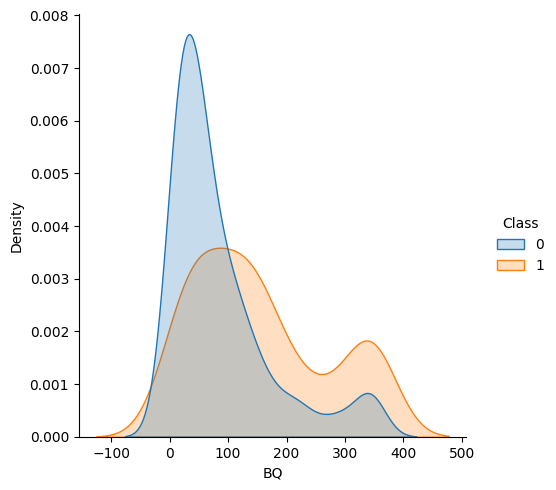

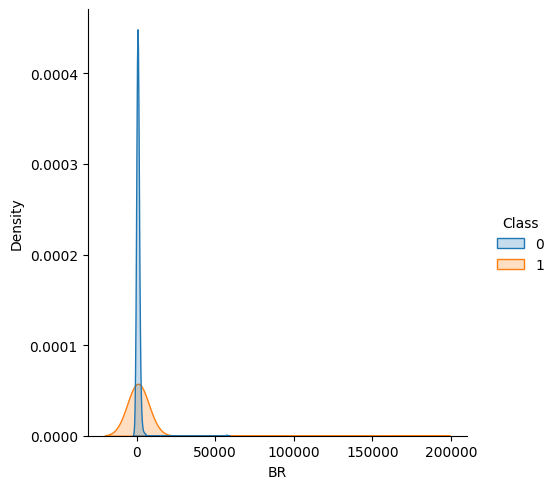

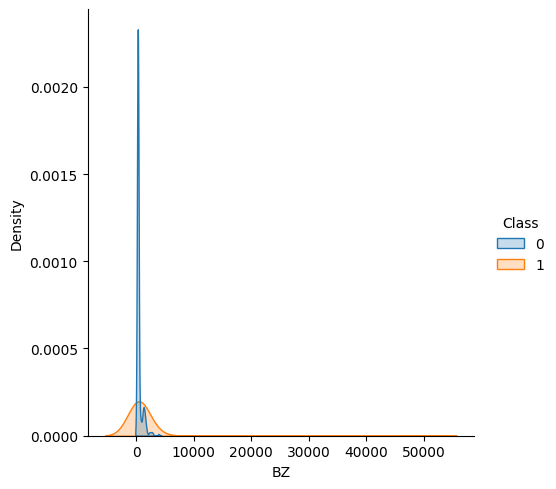

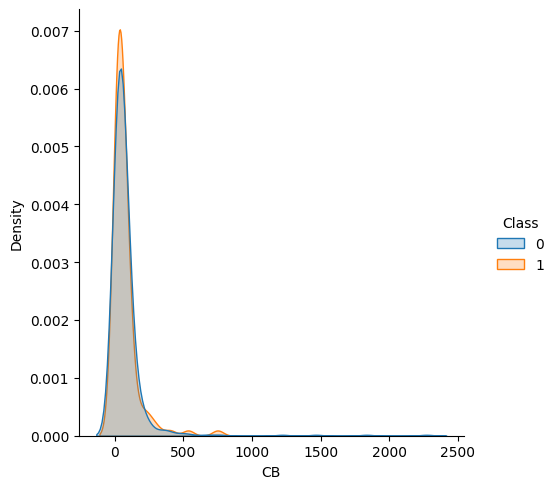

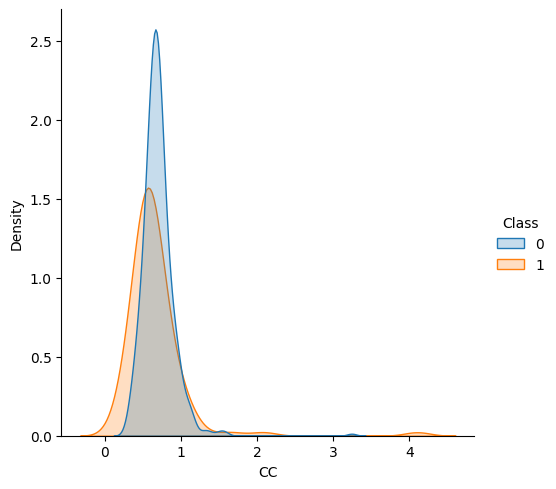

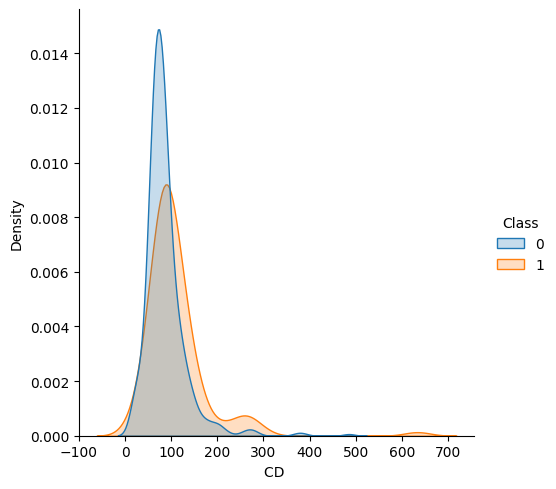

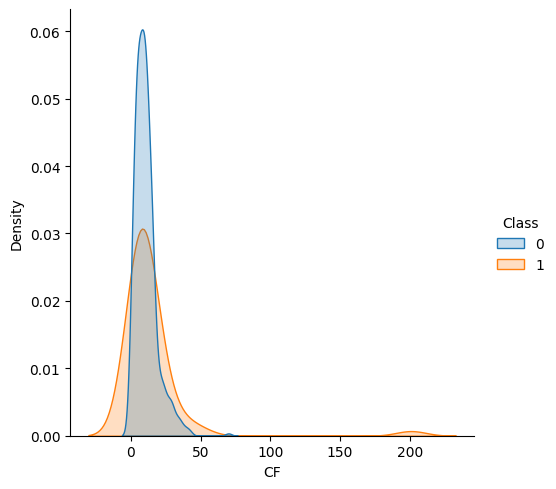

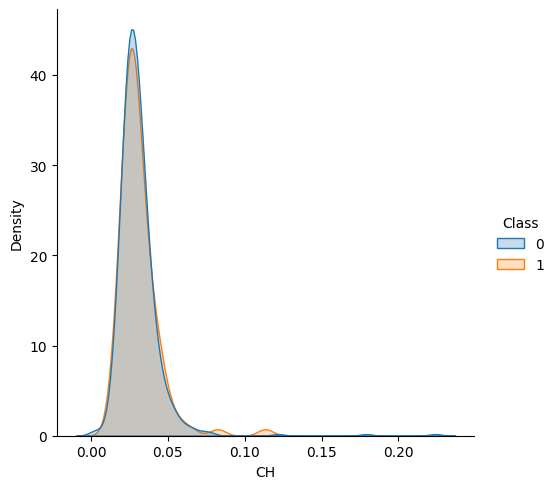

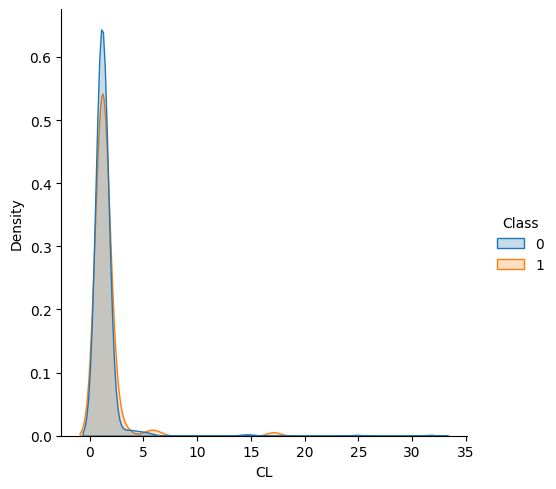

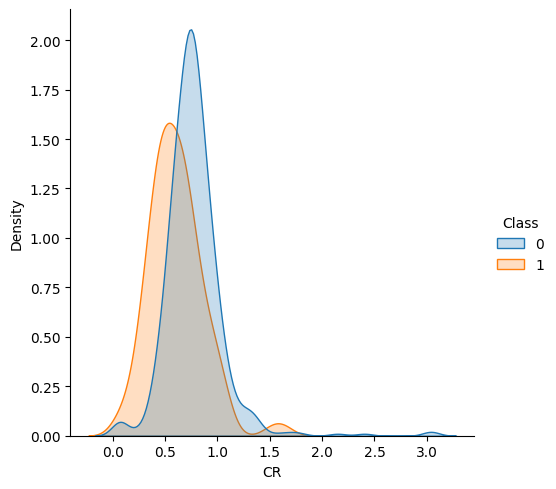

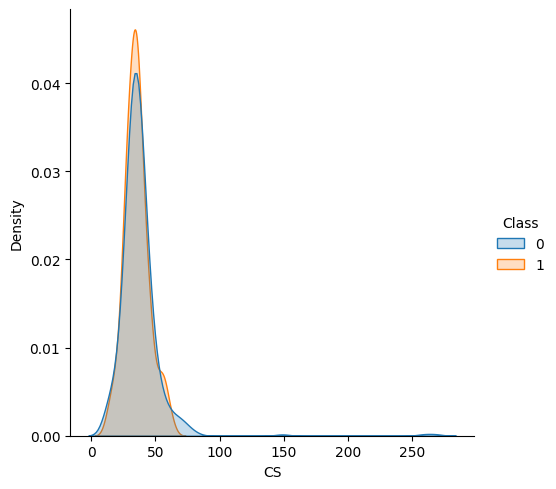

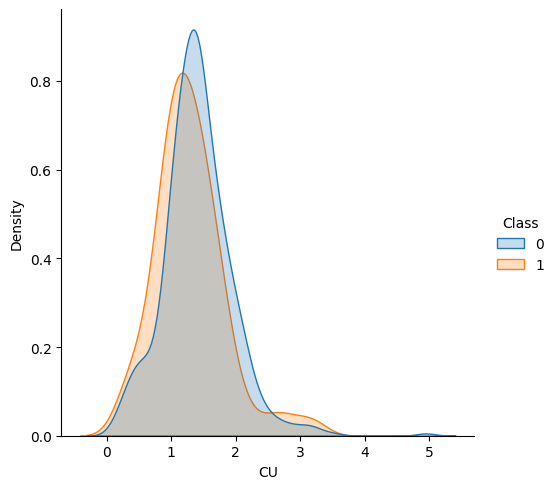

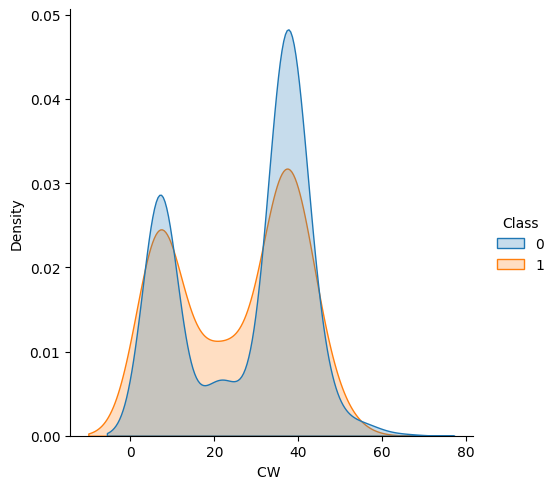

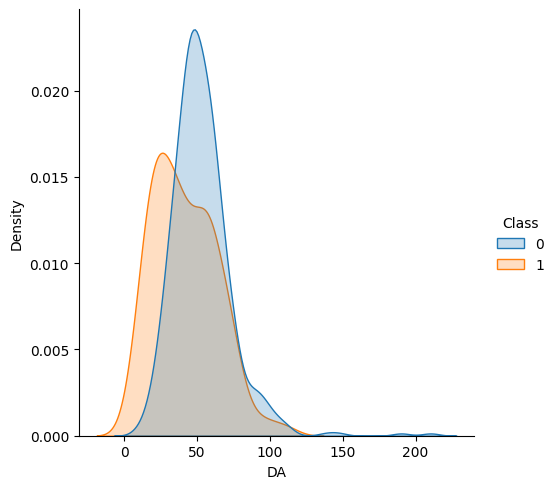

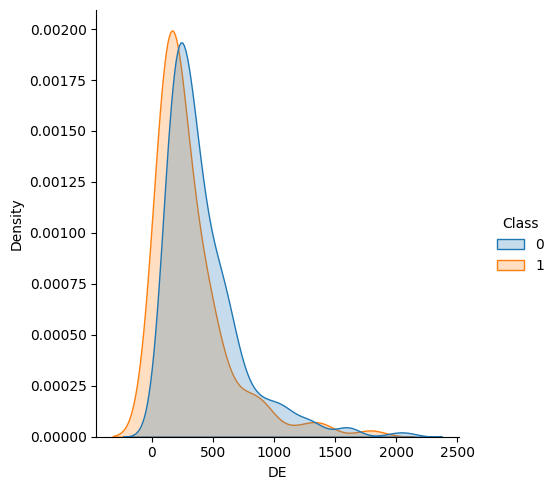

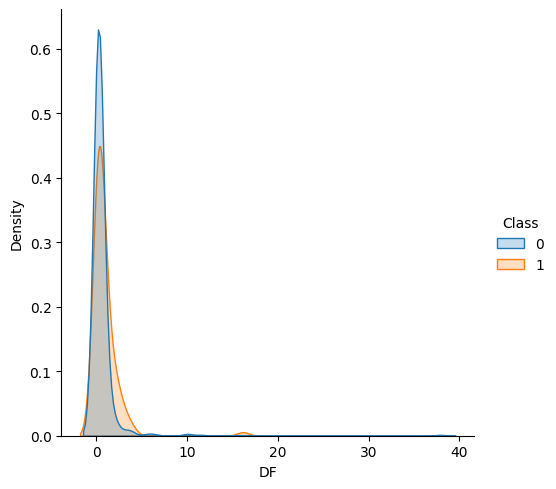

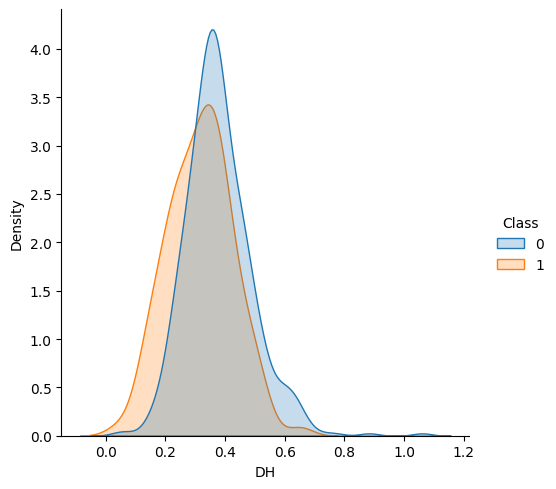

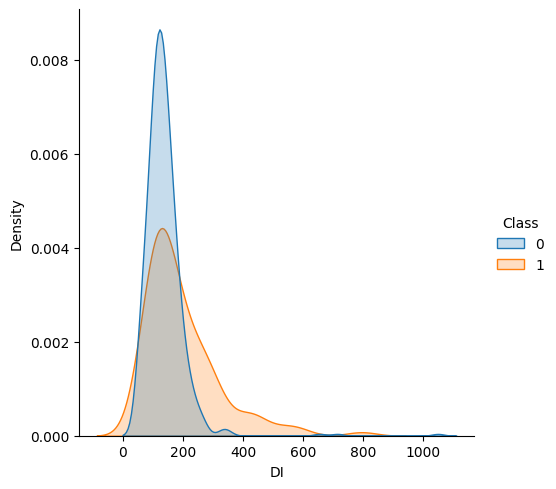

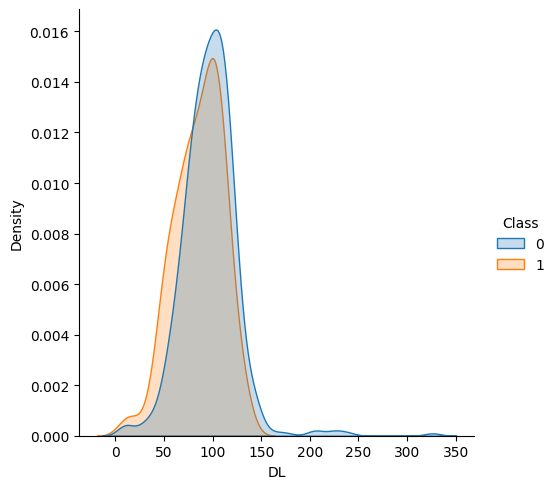

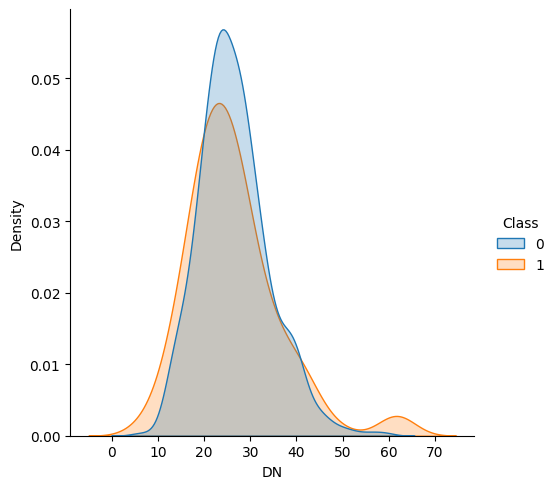

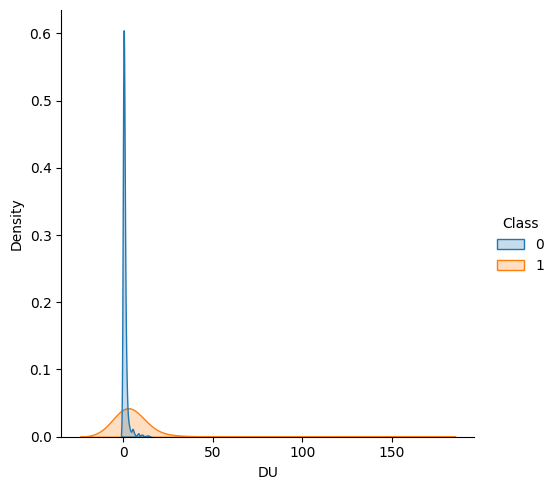

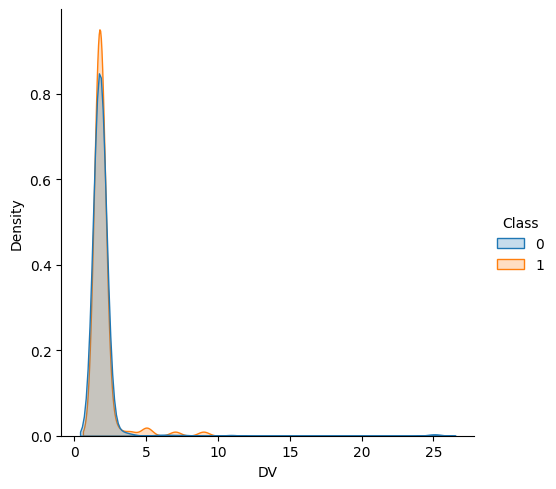

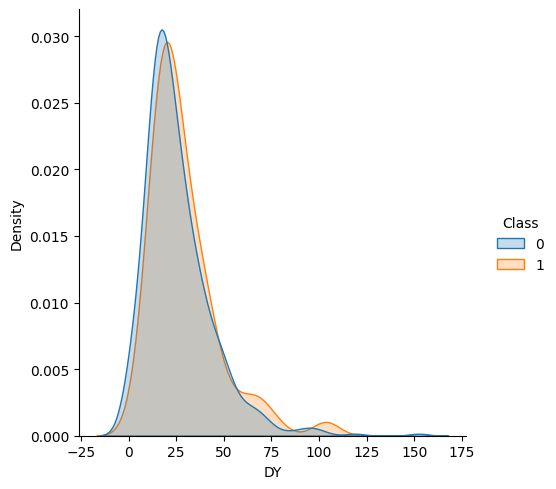

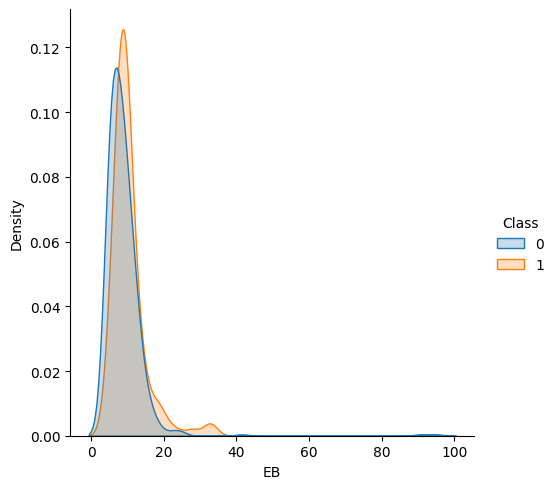

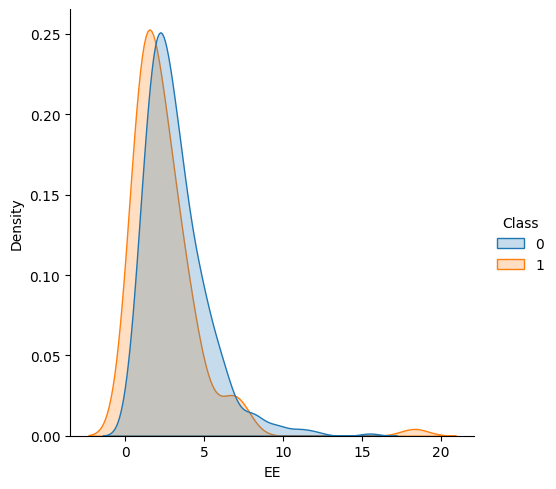

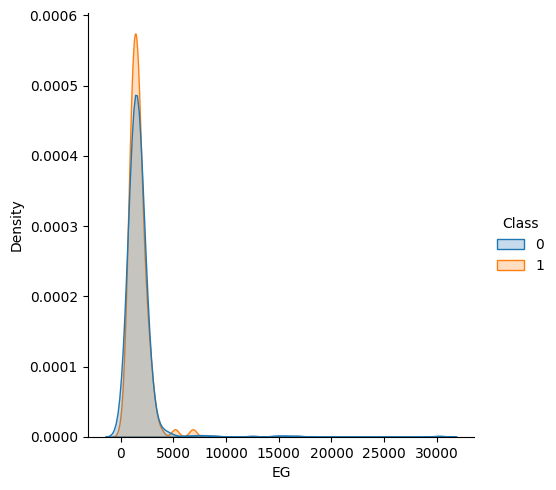

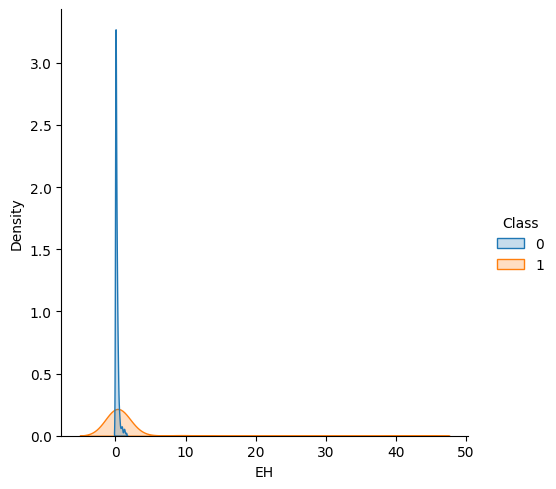

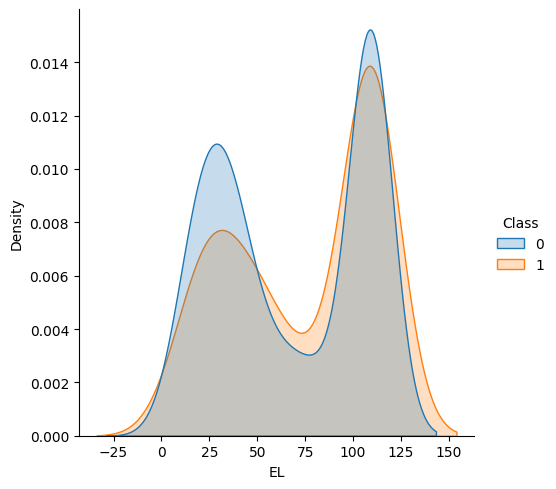

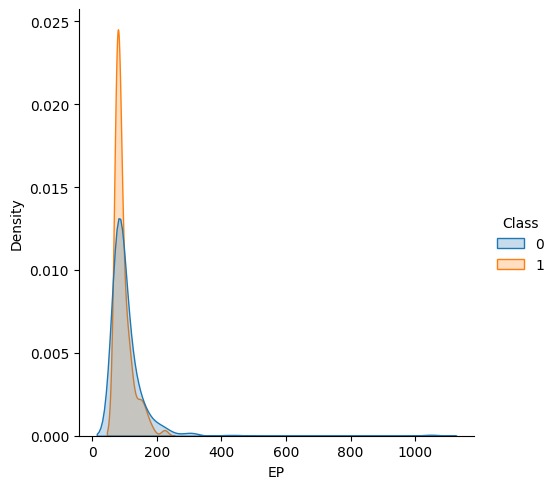

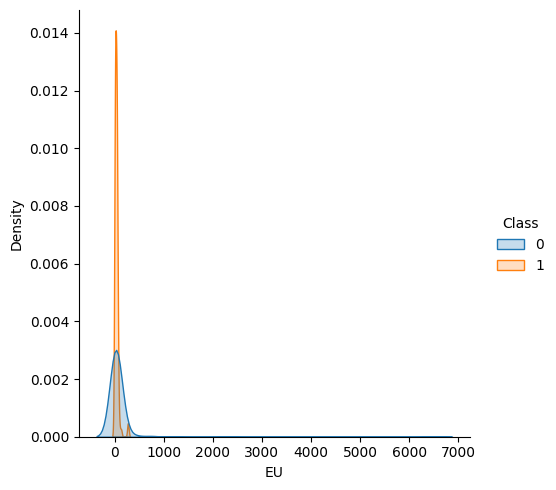

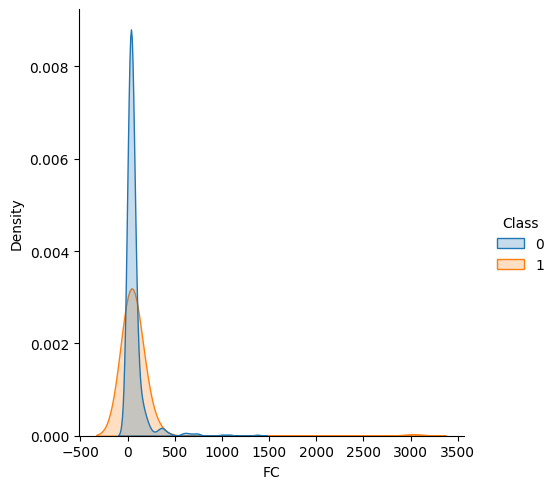

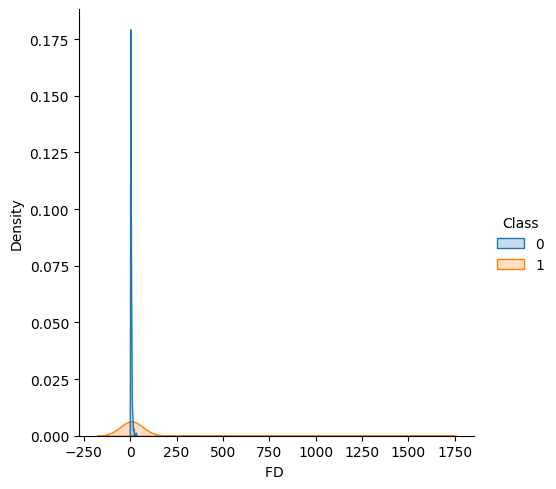

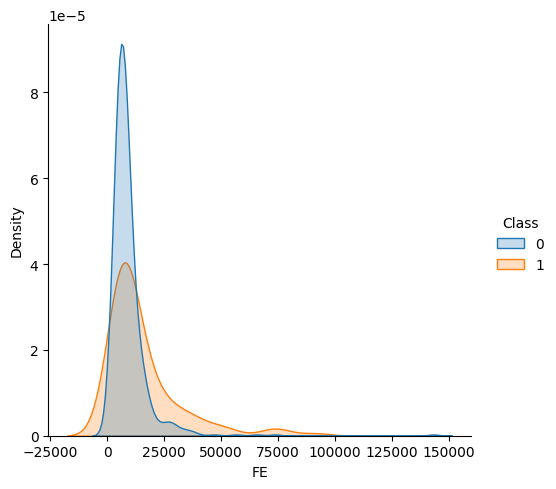

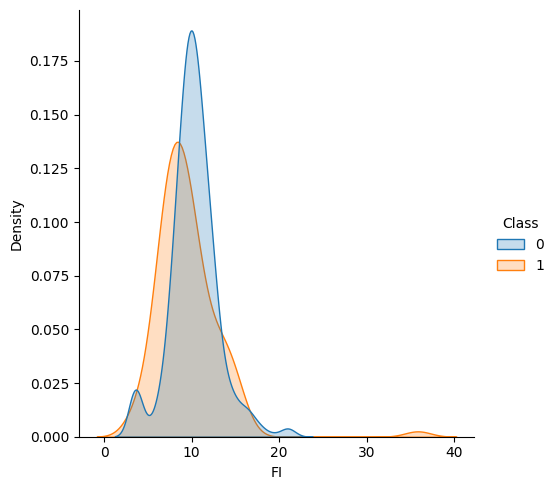

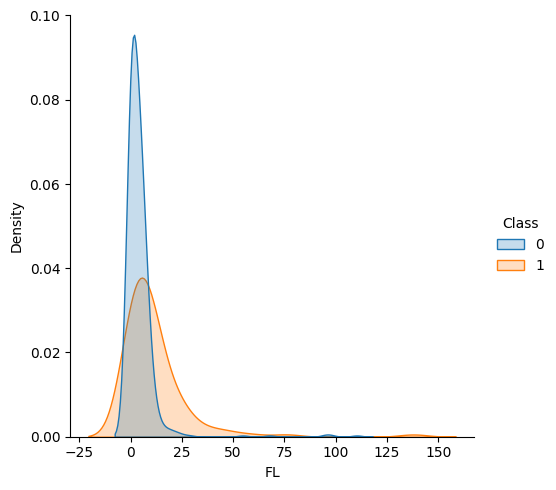

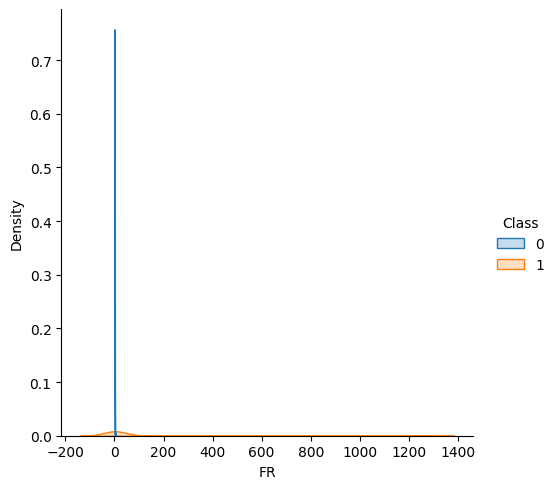

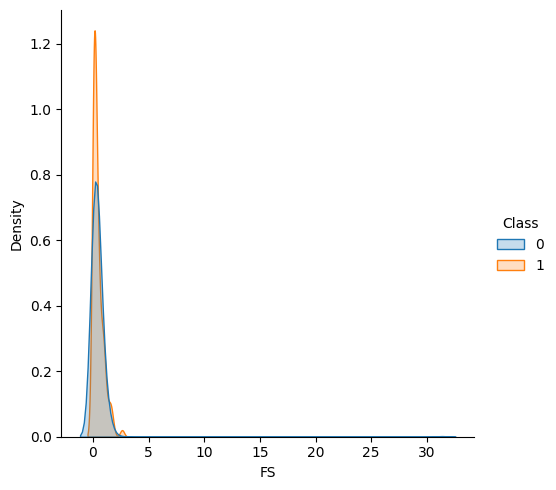

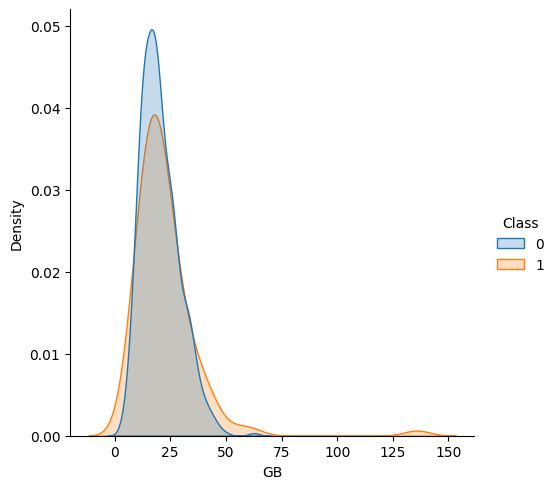

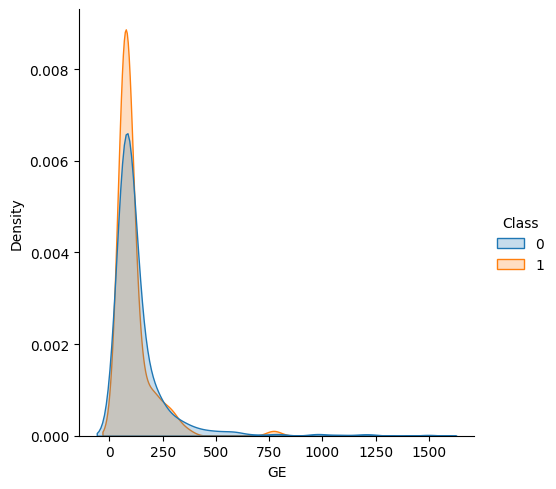

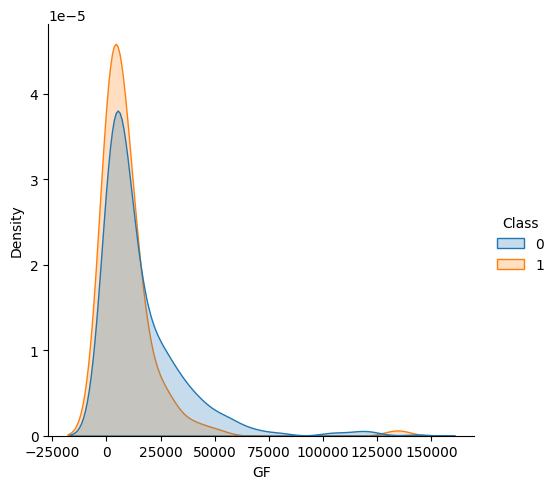

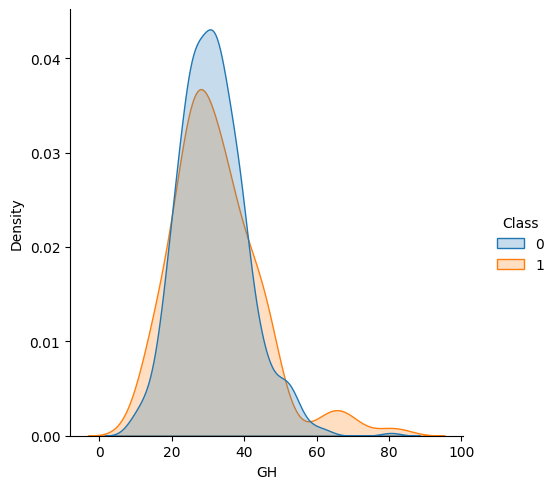

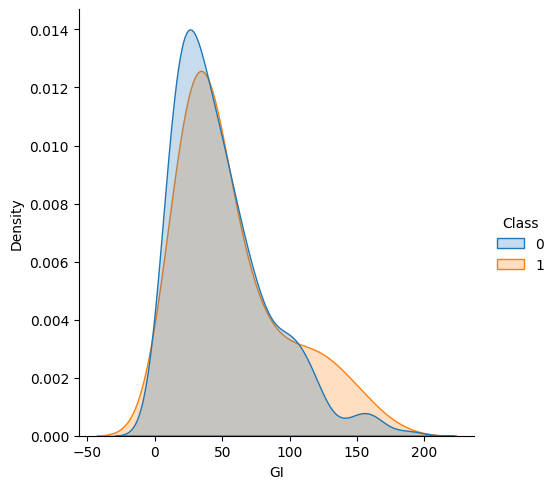

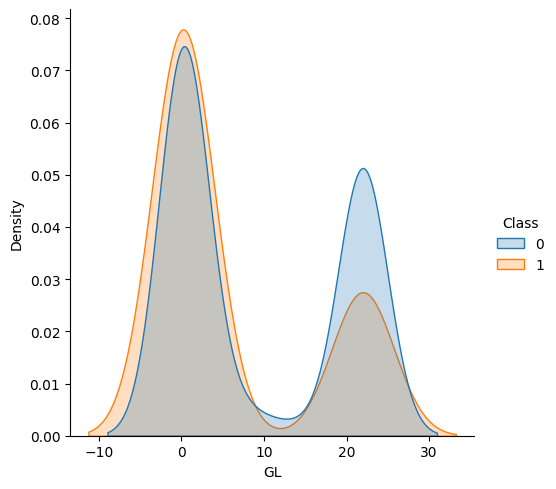

In [62]:
for f in features:
    sns.displot(data=train_set, x=f, hue='Class', kind='kde', fill=True, common_norm=False,)
    plt.show()


In [55]:
balanced_log_loss(train_set['Class'], train_set['y_hat'])

/Users/hanan/GitRepos/icr_kaggle/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


inf

In [54]:
train_set['y_hat'].value_counts()

y_hat
0    568
1     49
Name: count, dtype: int64

In [49]:
train_set['Class'].value_counts()

Class
0    509
1    108
Name: count, dtype: int64

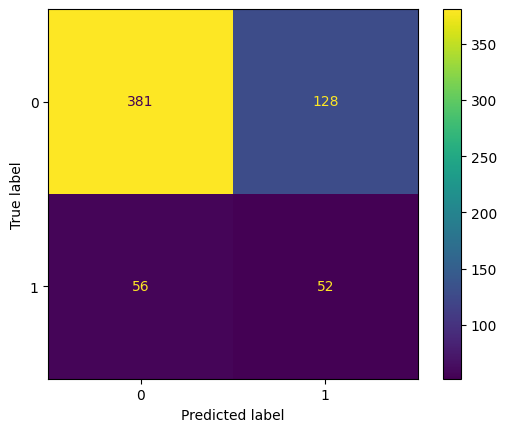

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(train_set['Class'], train_set['EH']> .21)
ConfusionMatrixDisplay(cm).plot()



In [72]:
train_set.groupby(target_col)['EH'].describe(percentiles=[.1, .25, .5, .75, .9, .95, .99])

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Class,,,,,,,,,,,,
0,509.0,0.152172,0.235608,0.003042,0.003042,0.003042,0.073008,0.212940,0.371124,0.565812,1.231645,1.521000
1,108.0,1.025886,4.330235,0.003042,0.003042,0.003042,0.176436,0.590148,1.410271,2.748751,10.217652,42.569748
